In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

file_path = 'D:/BCI_RL/important/ErrP/DMD/code/IncDMD/'
sub = ['1', '2', '3', '4', '5', '6']
ses = ['1', '2']
file_name = file_path+'Subject0'+sub[2]+'_s'+ses[0]+'.mat'

epoch_eeg = scipy.io.loadmat(file_name)['errorTrial']
print(epoch_eeg.shape)

(64, 900, 99)


In [2]:
import math 

trial = epoch_eeg[:,:,3]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

28
(1792, 873)


In [3]:
from pydmd import DMD

# total least square只影响b的计算，不影响Phi的计算
dmd = DMD(svd_rank=0,tlsq_rank=450, exact=True)    

dt = 1 / 300
dmd.fit(aug_trial)

dmd_f = dmd.frequency / dt
dmd_mode = dmd.modes
dmd_eigs = dmd.eigs
dmd_w = np.log(dmd_eigs) / dt

print(dmd.modes.shape)

idx = [i for i in range(len(dmd_f)) if dmd_f[i] > 1 and dmd_f[i] < 25]
f = dmd_f[idx]
sidx = np.argsort(f)
f = f[sidx]
print(len(f))

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 1813345121.7023067. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


(1792, 351)
73


In [4]:
dmd_w = dmd_w[idx][sidx]
time = dmd.dmd_timesteps * dt

In [5]:
# 根据数据矩阵和模态矩阵计算b
def _optimal_dmd_matrixes(eigs, order, _snapshots, modes):
    # compute the vandermonde matrix
    vander = np.vander(eigs, order, True)

    # perform svd on all the snapshots
    U, s, V = np.linalg.svd(_snapshots, full_matrices=False)

    P = np.multiply(
        np.dot(modes.conj().T, modes),
        np.conj(np.dot(vander, vander.conj().T)),
    )

    tmp = np.linalg.multi_dot([U, np.diag(s), V]).conj().T   
    q = np.conj(np.diag(np.linalg.multi_dot([vander, tmp, modes])))

    return P, q

# 数据滑窗
window = math.ceil(1.5/dt)
print(window)

iend = len(aug_trial[1])-window
hop = math.ceil(0.05/dt)  # 步进
istep = list(range(0,iend,hop))

bpack = np.empty((len(f), len(istep)))
tpack = []
j = 0
for i in istep: 
    seg_trial = aug_trial[:, i:i+window]
    timepoint = time[i]
    tpack.append(time[i]-2)
    _snapshots = seg_trial
    order = _snapshots.shape[1]
    a = np.linalg.solve(*_optimal_dmd_matrixes(dmd_eigs, order, _snapshots, dmd_mode))
    a = a[idx][sidx]
    a = np.absolute(a)
    a = a / np.exp(dmd_w.real*timepoint)
    bpack[:, j] = a.T
    j += 1
    
print(bpack.shape) 

450
(73, 29)


In [6]:
# import seaborn as sns

# sns.heatmap(data=bpack,
#            yticklabels=list(map(str,np.round(f, 2))),
#            xticklabels=['-0.2-0','0-0.2','0.2-0.4','0.4-0.6','0.6-0.8'])
# print(bpack)

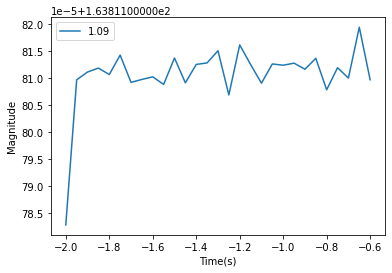

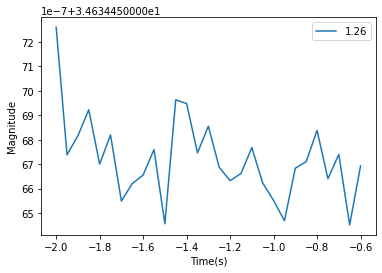

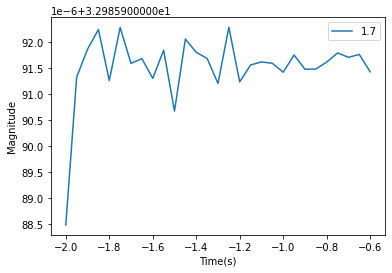

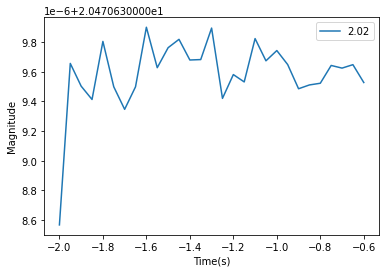

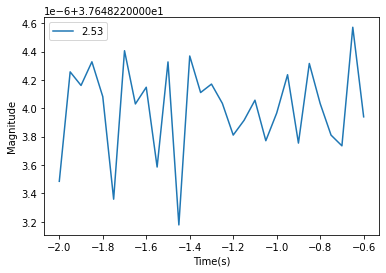

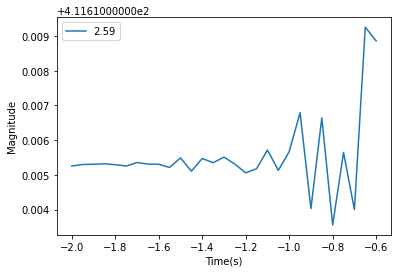

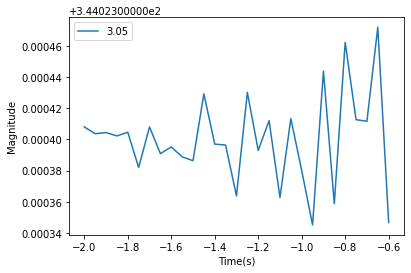

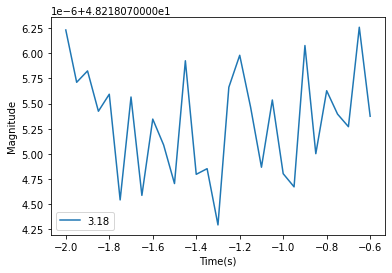

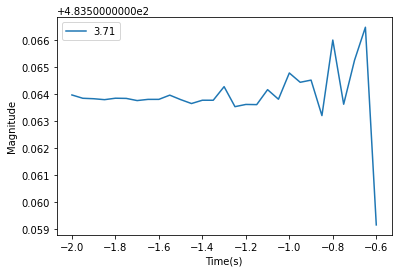

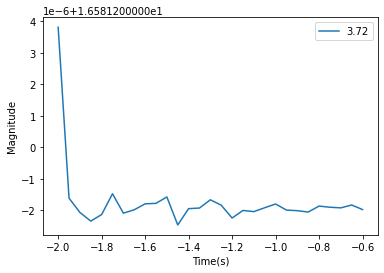

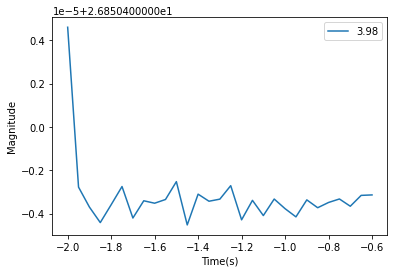

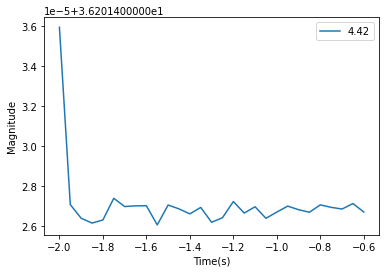

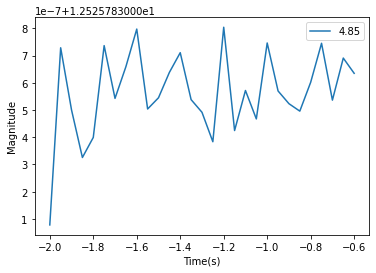

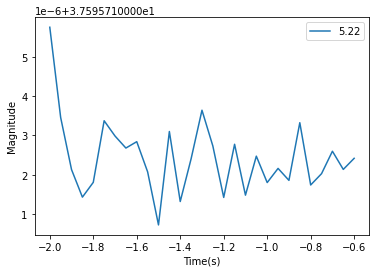

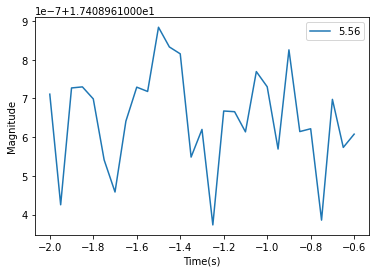

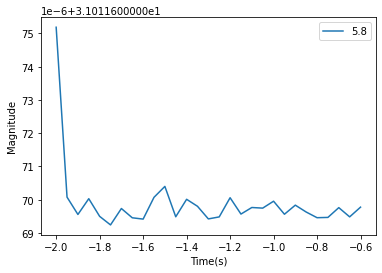

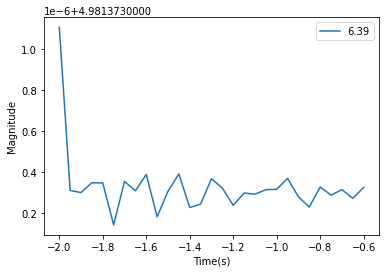

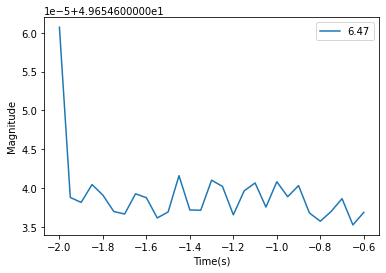

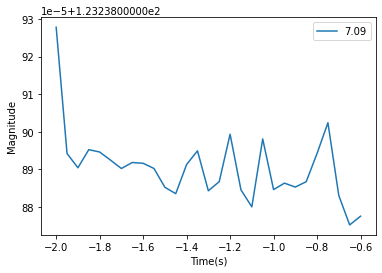

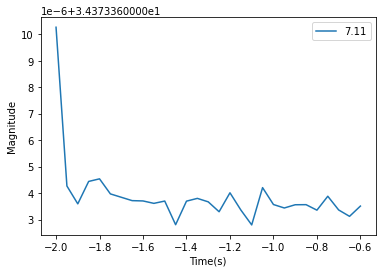

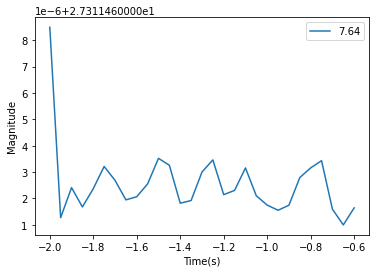

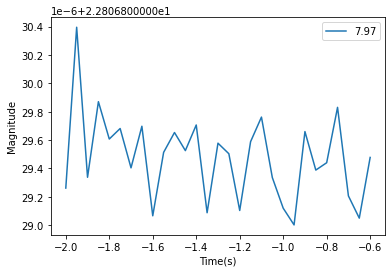

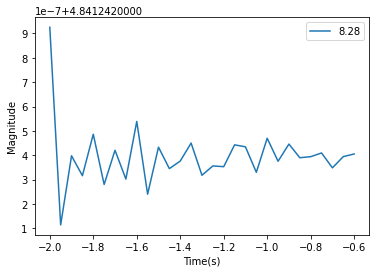

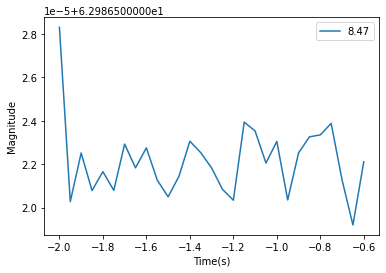

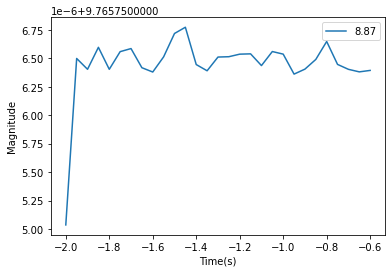

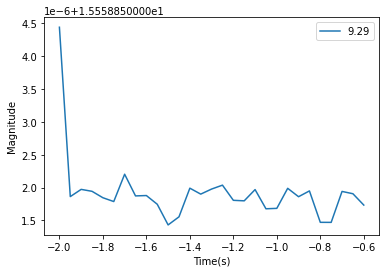

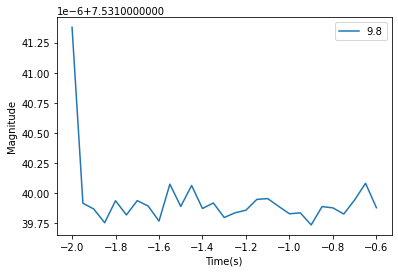

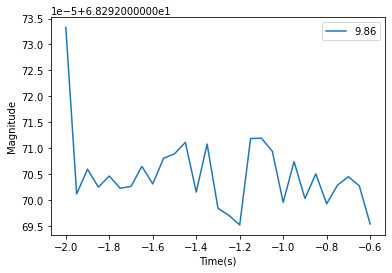

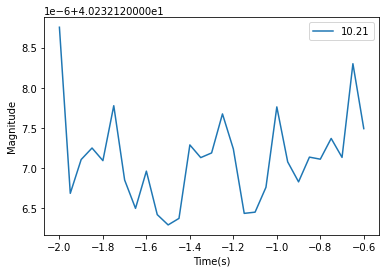

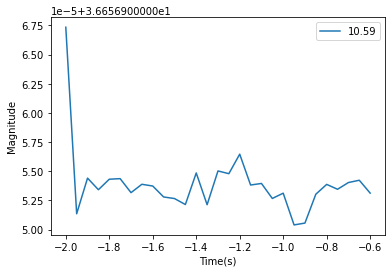

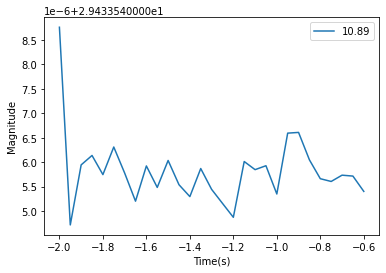

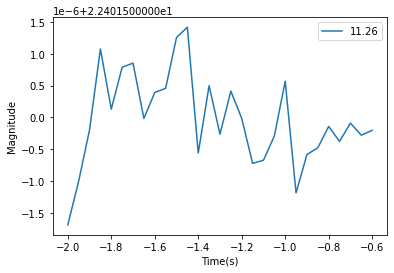

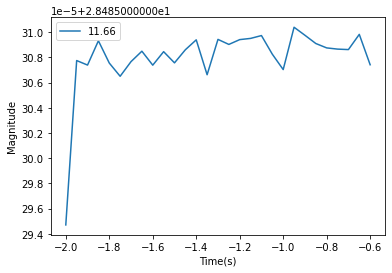

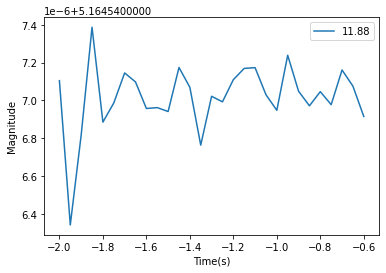

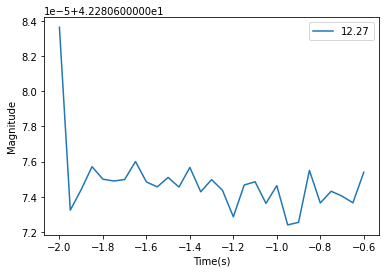

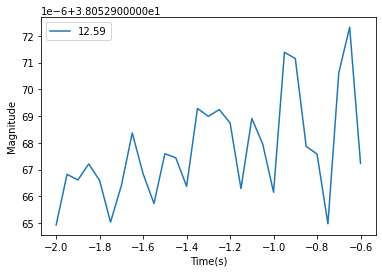

In [7]:
# -2----4s
for i in range(len(f)//2):
    plt.plot(tpack, bpack[i,:], label=str(np.round(f[i],2)))
    # plt.xticks(np.arange(20),('-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4','','0.5','','0.6','','0.7',''))
    plt.legend()
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.show()

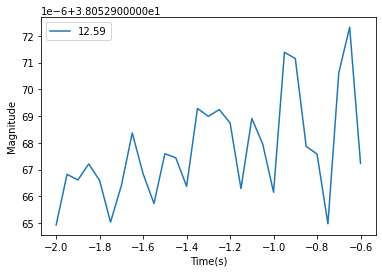

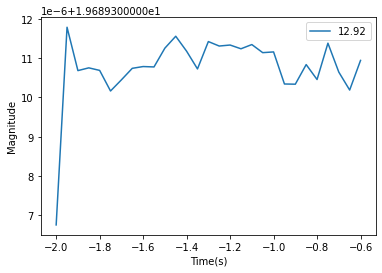

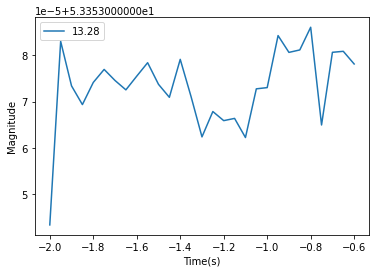

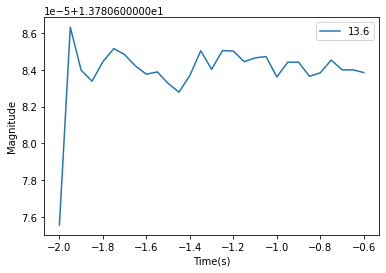

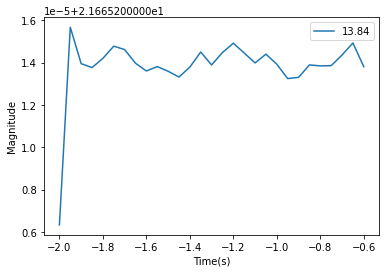

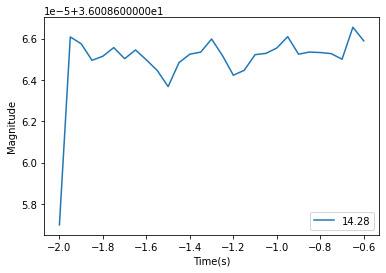

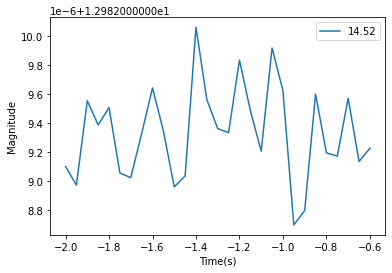

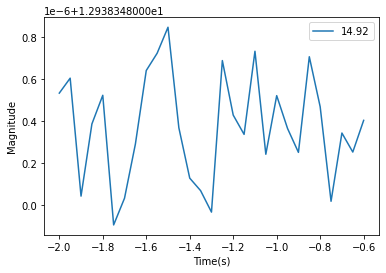

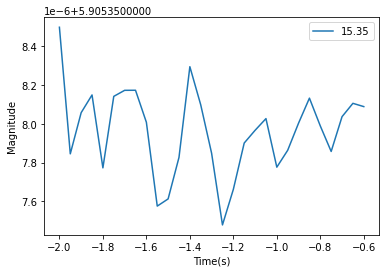

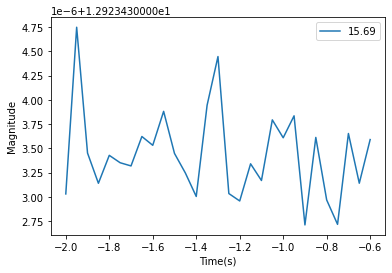

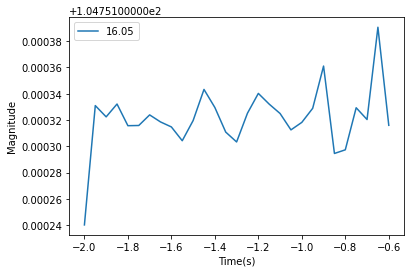

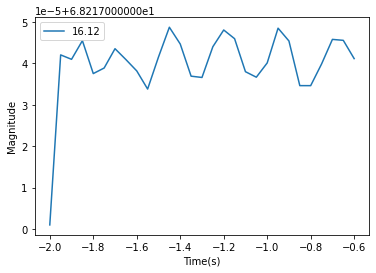

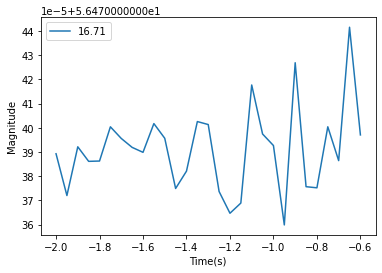

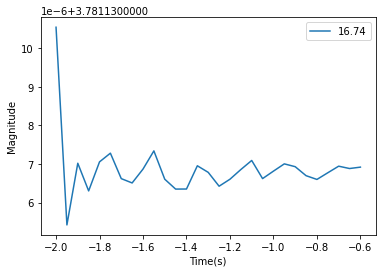

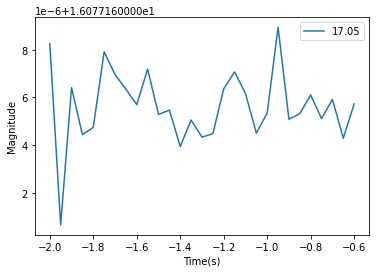

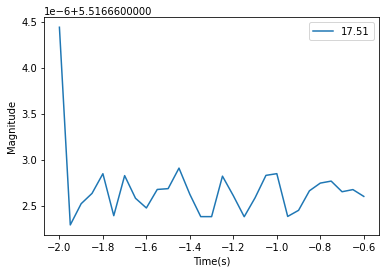

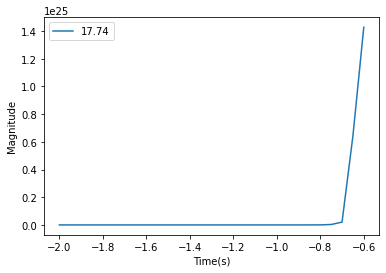

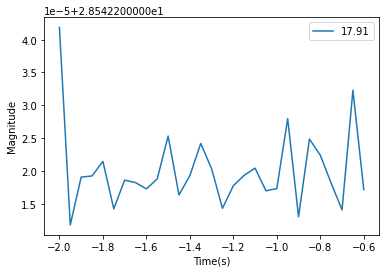

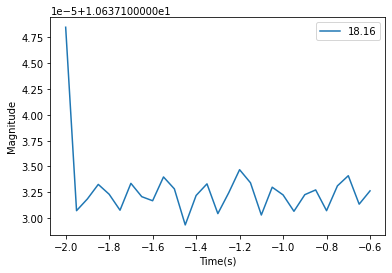

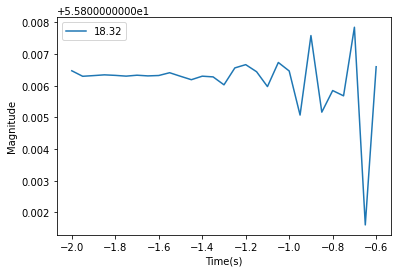

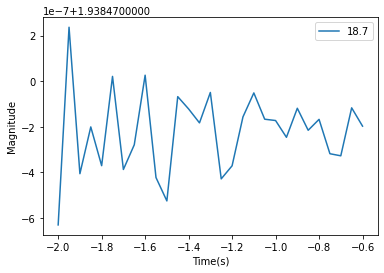

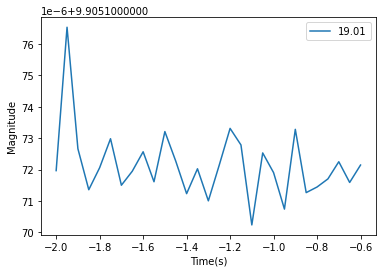

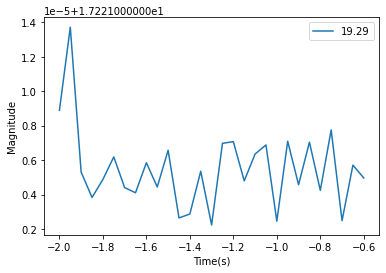

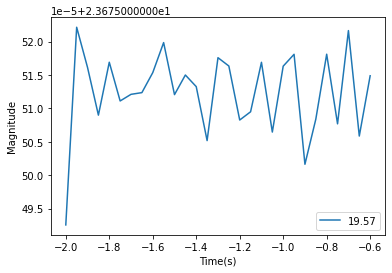

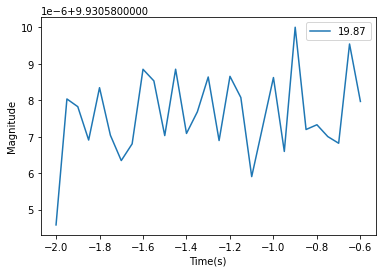

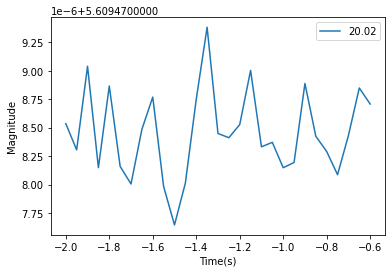

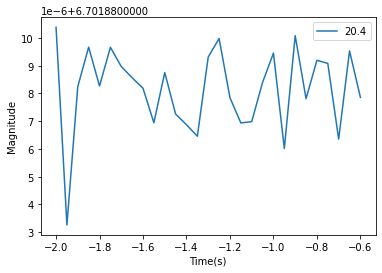

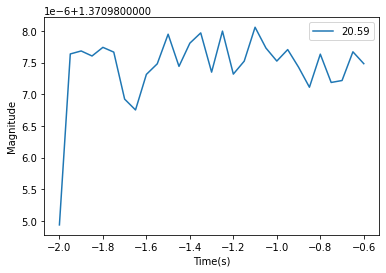

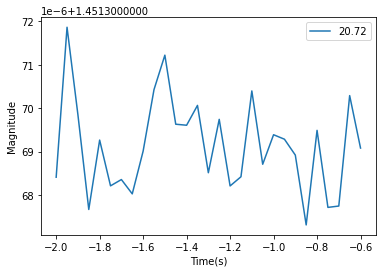

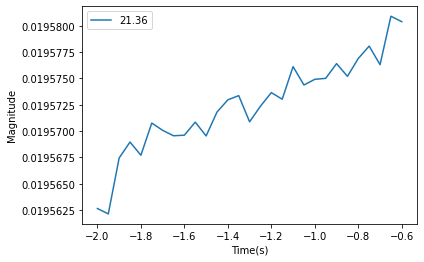

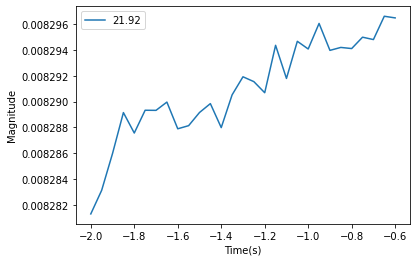

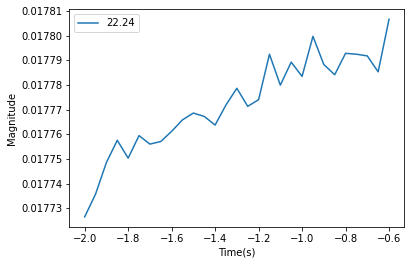

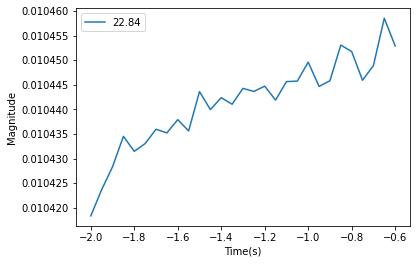

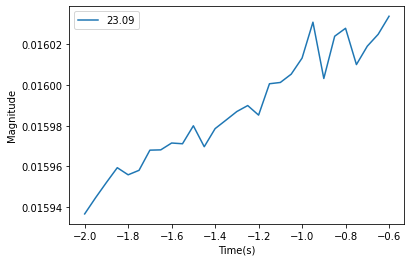

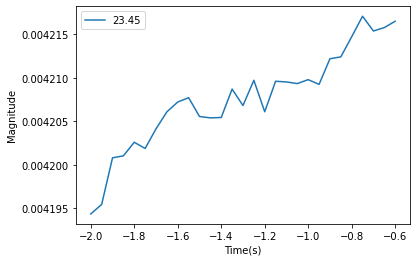

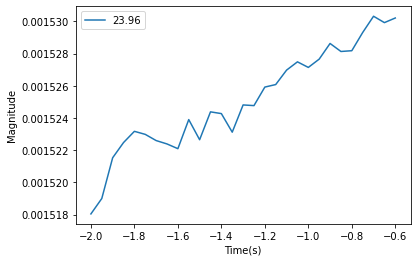

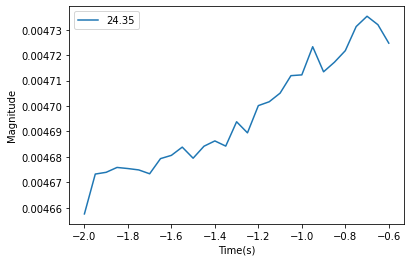

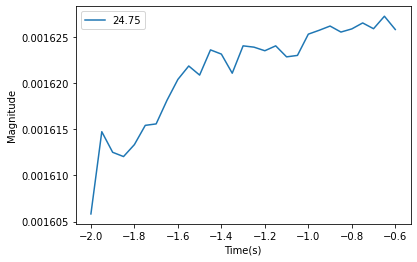

In [8]:
for j in range(i, len(f)):
    plt.plot(tpack, bpack[j,:], label=str(np.round(f[j],2)))
    # plt.xticks(np.arange(20),('-0.2','','-0.1','','0','','0.1','','0.2','','0.3','','0.4','','0.5','','0.6','','0.7',''))
    plt.legend()
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.show()

In [9]:
# Motor Imaginary Data

In [10]:
file_name = 'D:/MotorIm/BCI_db/data/预处理后/BinaryData/A01T_left.mat'

epoch_eeg = scipy.io.loadmat(file_name)['bci_l']
print(epoch_eeg.shape)

(22, 1750, 72)


In [11]:
trial = epoch_eeg[:,:,10]  # nchannel * time points

# EEG stack
m = trial.shape[0]  # 行
n = trial.shape[1]  # 列
nstack = math.ceil(n*2 / (m+2))

aug_trial = np.array(trial[:,0:n-nstack+0+1])
for st in range(1, nstack):
    aug_trial = np.vstack((aug_trial, trial[:,st:n-nstack+st+1]))
print(nstack)
print(aug_trial.shape)

146
(3212, 1605)


In [12]:
# -2----5s
# 原始：-1----4s
# total least square只影响b的计算，不影响Phi的计算
from pydmd import DMD
dmd = DMD(svd_rank=0,tlsq_rank=400,exact=True)    

dt = 1 / 250
dmd.fit(aug_trial)

dmd_f = dmd.frequency / dt
dmd_mode = dmd.modes
dmd_eigs = dmd.eigs
dmd_w = np.log(dmd_eigs) / dt

print(dmd.modes.shape)

idx = [i for i in range(len(dmd_f)) if dmd_f[i] > 5 and dmd_f[i] < 35]
f = dmd_f[idx]
sidx = np.argsort(f)
f = f[sidx]
print(len(f))
print(f)

C:\software\anaconda\envs\pytorch-gpu\lib\site-packages\pydmd\dmdbase.py:351: UserWarning: Input data matrix X has condition number 6714980.803965761. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  cond_number


(3212, 400)
189
[ 6.21815097  6.34036139  6.5325777   6.66706331  6.89229939  6.99257233
  7.19031717  7.27732984  7.51141857  7.53091365  7.5864413   7.73023405
  7.89766179  8.06713332  8.29584187  8.3810167   8.58936026  8.64164291
  8.86946256  8.96026952  9.19765237  9.38543648  9.42865673  9.68091221
  9.80701315  9.96957282 10.11365024 10.26325847 10.52735686 10.56183223
 10.71208894 10.7273725  11.01363457 11.1363731  11.25542735 11.53822028
 11.56828336 11.82427513 11.89671689 12.19716563 12.21071979 12.29335513
 12.48895329 12.63965355 12.79060012 12.96187462 13.18592248 13.19110192
 13.40227097 13.61508901 13.72459419 13.87152438 14.04698635 14.19484948
 14.35686905 14.49899441 14.68425138 14.88211949 15.09167703 15.1169739
 15.2578865  15.45270953 15.62641037 15.79423503 15.86720645 16.08619899
 16.24339808 16.46097826 16.55476115 16.64448889 16.90264585 17.03002092
 17.11169071 17.32296361 17.52001261 17.640775   17.7499999  17.91242945
 18.12618756 18.22549343 18.3888649 

In [13]:
w = dmd_w[idx][sidx]
time = dmd.dmd_timesteps * dt
print(time.shape)

(1605,)


In [14]:
# plt.plot(trial)

In [15]:
# 根据数据矩阵和模态矩阵计算b
# Total least square? opt?
def _optimal_dmd_matrixes(eigs, order, _snapshots, modes):
    # compute the vandermonde matrix
    vander = np.vander(eigs, order, True)

    # perform svd on all the snapshots
    U, s, V = np.linalg.svd(_snapshots, full_matrices=False)

    P = np.multiply(
        np.dot(modes.conj().T, modes),
        np.conj(np.dot(vander, vander.conj().T)),
    )

    tmp = np.linalg.multi_dot([U, np.diag(s), V]).conj().T   
    q = np.conj(np.diag(np.linalg.multi_dot([vander, tmp, modes])))

    return P, q

# seg = 500
# row, col = len(aug_trial), len(aug_trial[0])
# hop = col//seg
# bpack = np.empty((len(f), seg))
# for i in range(seg):
#     seg_trial = aug_trial[:, hop*i:hop*(i+1)]
#     timepoint = time[hop*i]
#     _snapshots = seg_trial
#     order = _snapshots.shape[1]
#     a = np.linalg.solve(*_optimal_dmd_matrixes(dmd_eigs, order, _snapshots, dmd_mode))
#     a = a[idx][sidx]
#     a = np.absolute(a)
#     a = a / np.exp(dmd_w.real*timepoint)
    
#     bpack[:, i] = a.T
# print(bpack.shape)


# 数据滑窗
window = math.ceil(1.7/dt)
print(window)

iend = len(aug_trial[1])-window
hop = math.ceil(0.05/dt)  # 步进0.1s
istep = list(range(0,iend,hop))

bpack = np.empty((len(f), len(istep)))
tpack = []
j = 0
for i in istep: 
    seg_trial = aug_trial[:, i:i+window]
    timepoint = time[i]
    tpack.append(timepoint-2)
    _snapshots = seg_trial
    order = _snapshots.shape[1]
    a = np.linalg.solve(*_optimal_dmd_matrixes(dmd_eigs, order, _snapshots, dmd_mode))
    a = a[idx][sidx]
    a = np.absolute(a)
    a = a / np.exp(w.real*timepoint)
    bpack[:, j] = a.T
    j += 1
    
print(bpack.shape)    



425
(189, 91)


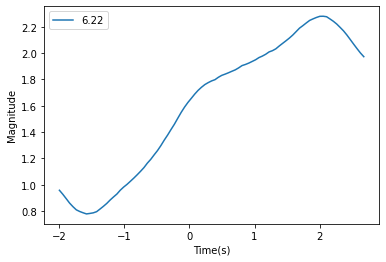

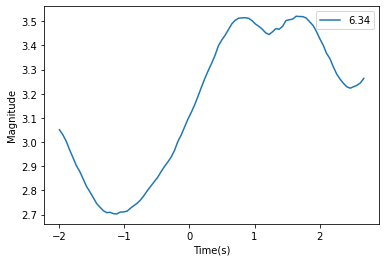

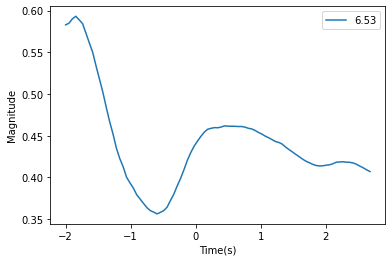

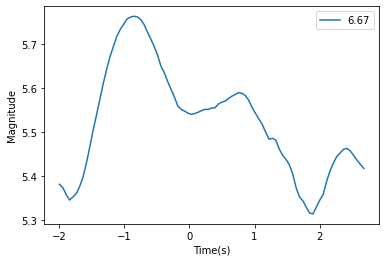

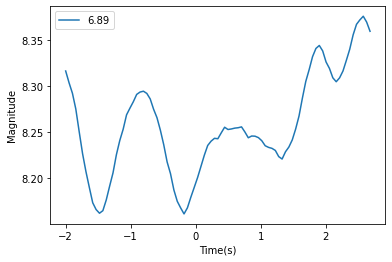

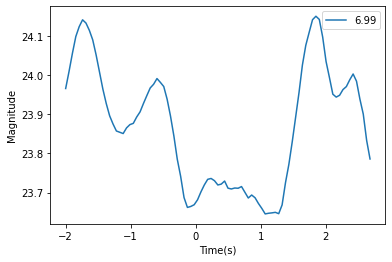

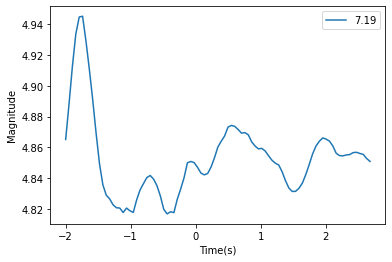

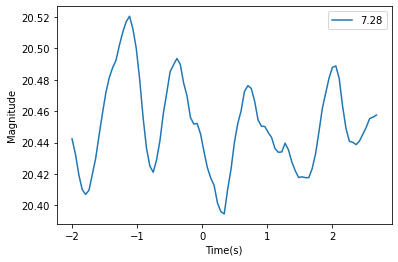

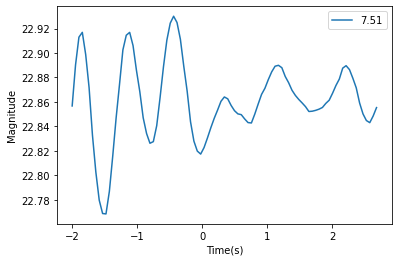

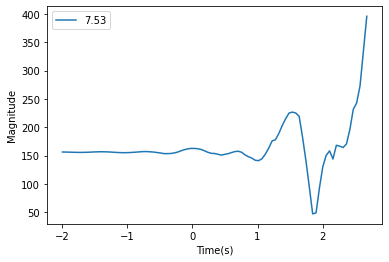

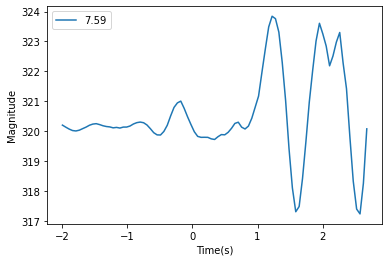

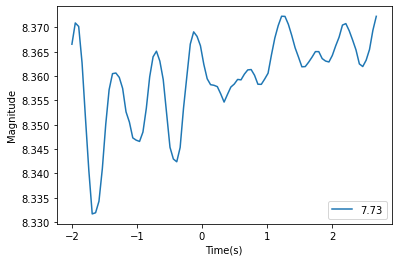

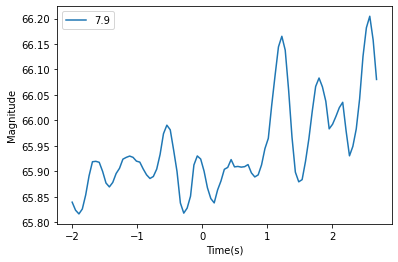

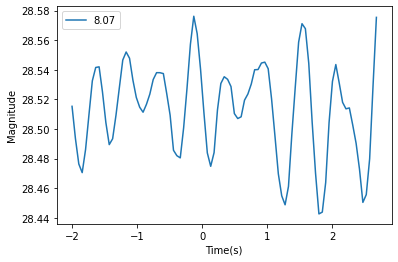

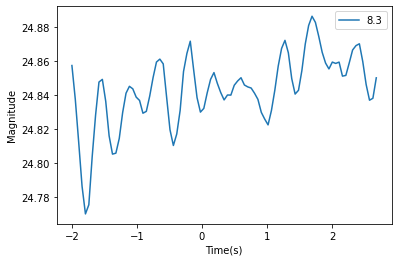

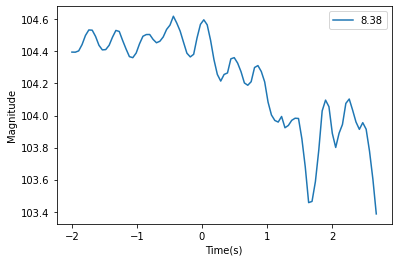

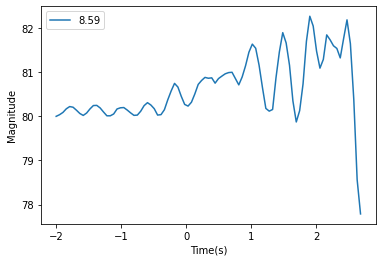

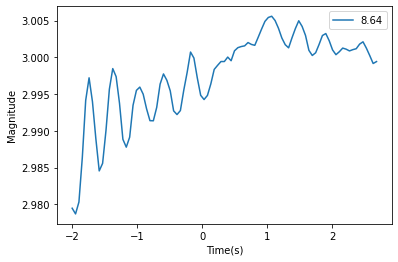

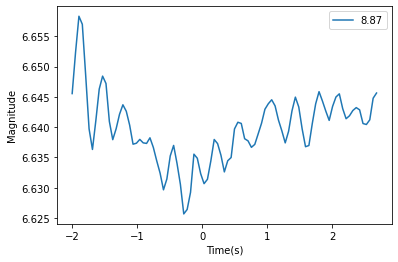

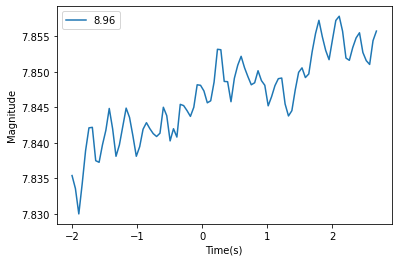

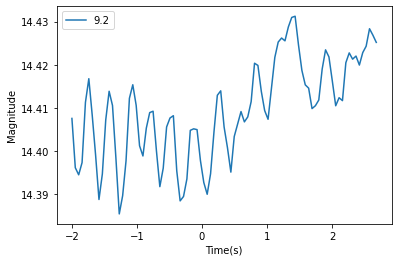

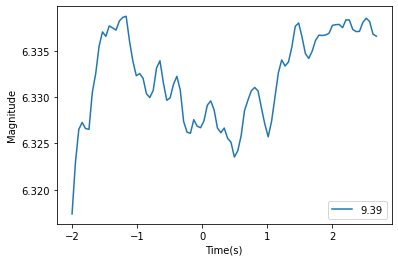

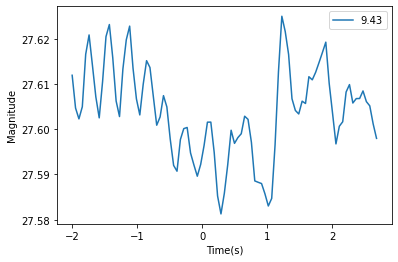

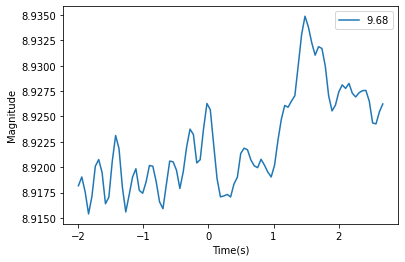

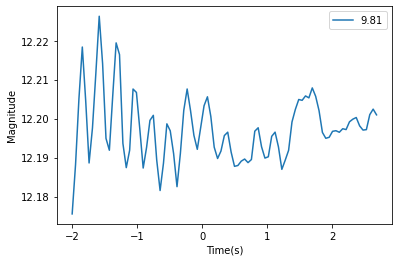

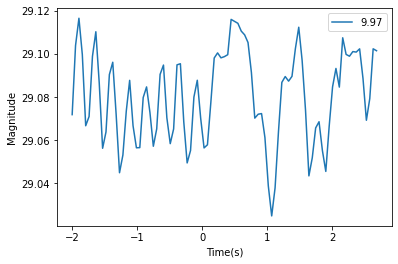

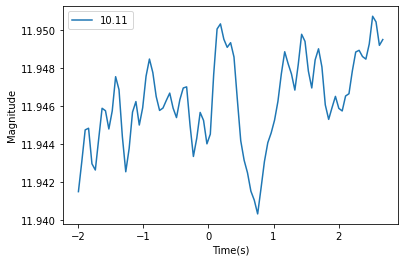

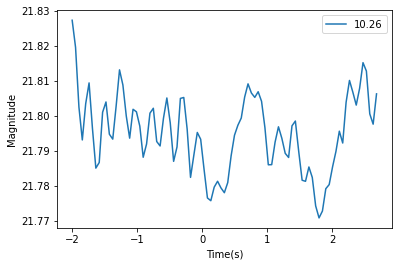

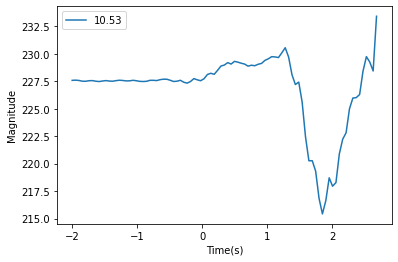

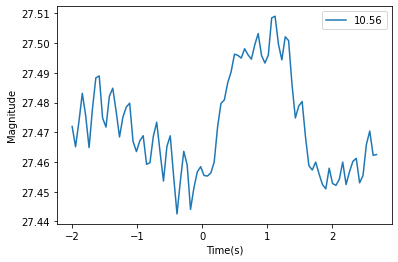

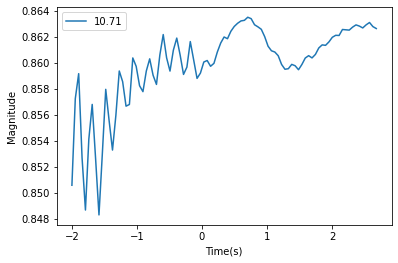

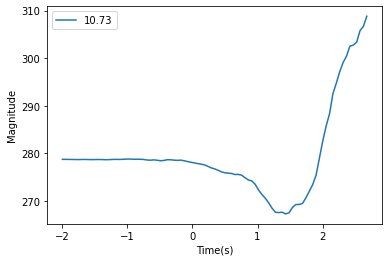

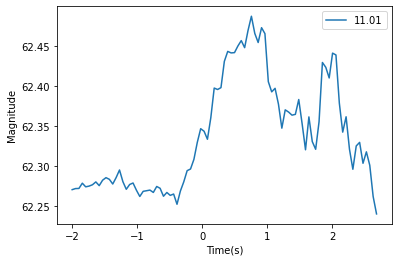

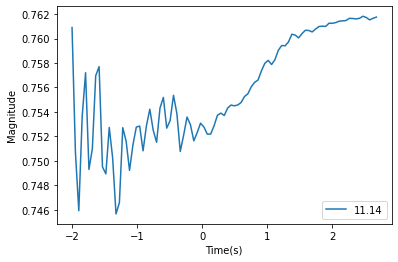

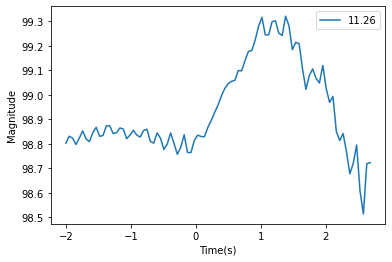

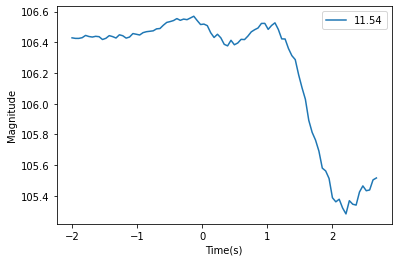

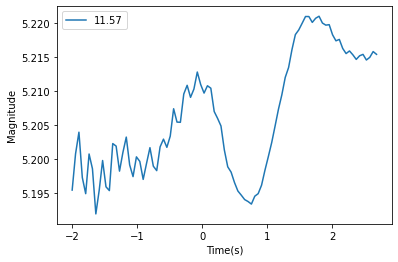

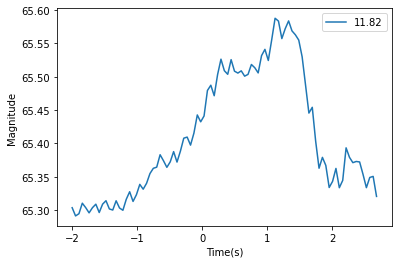

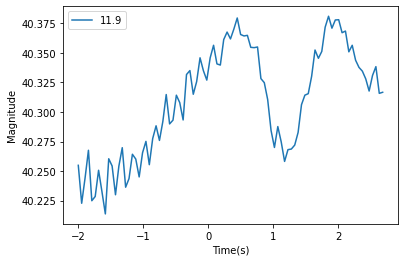

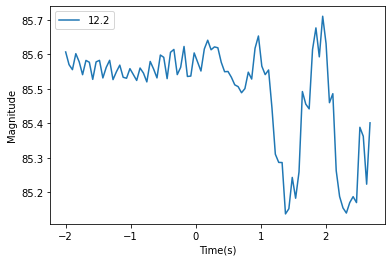

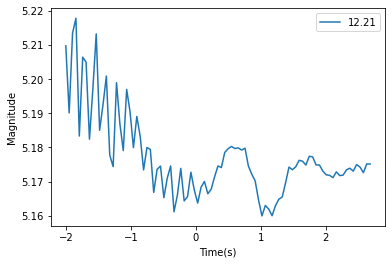

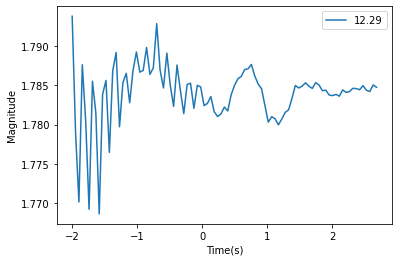

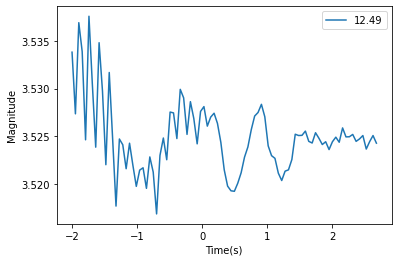

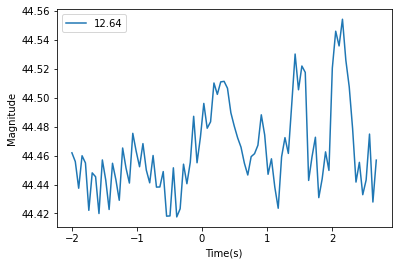

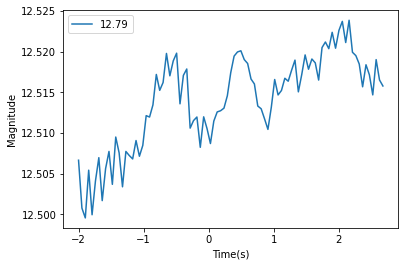

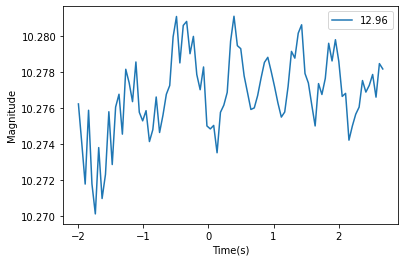

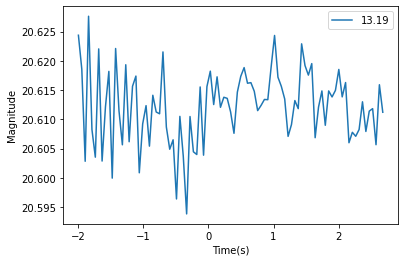

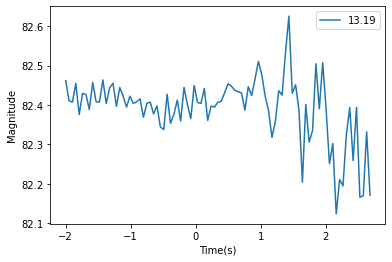

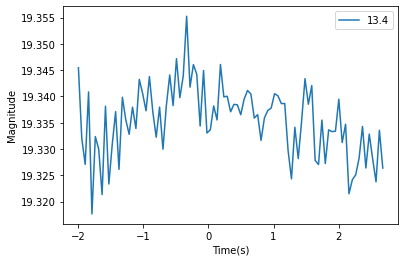

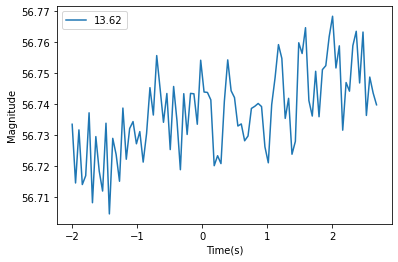

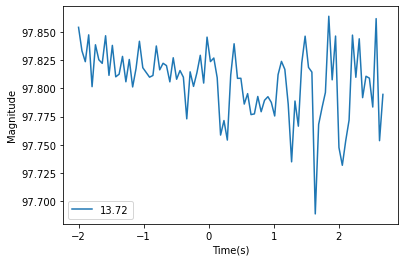

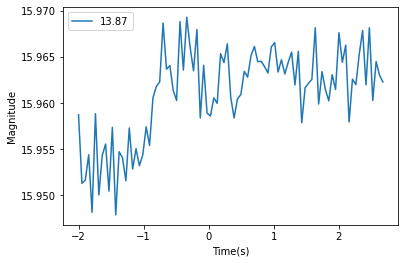

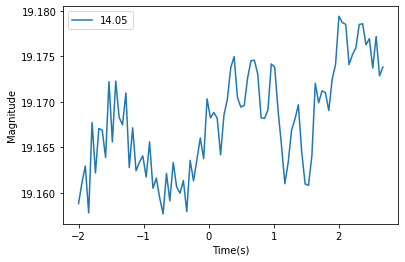

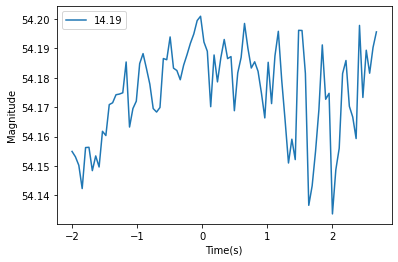

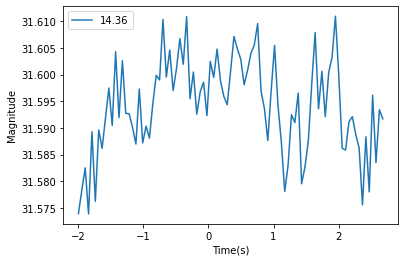

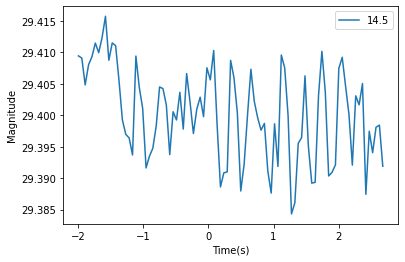

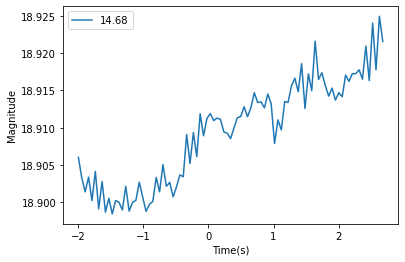

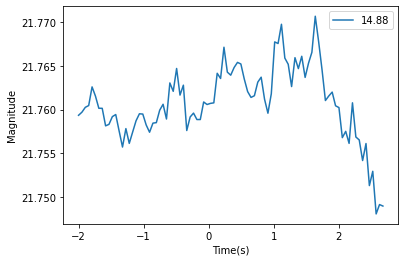

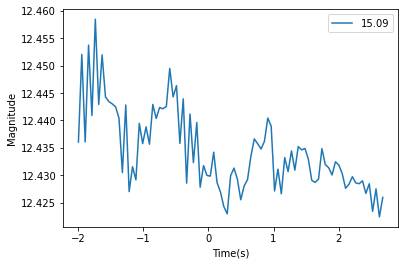

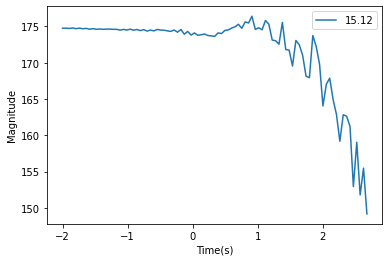

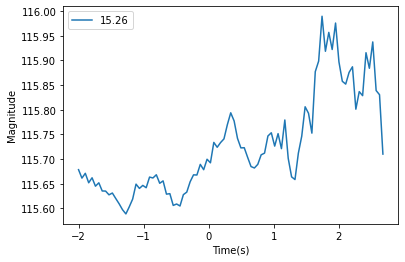

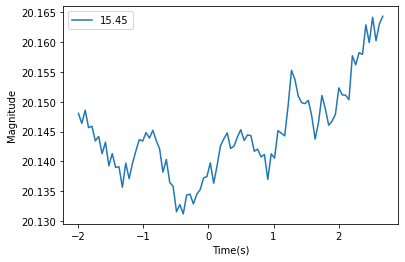

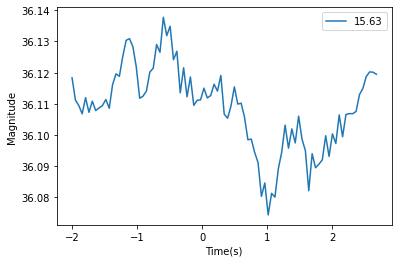

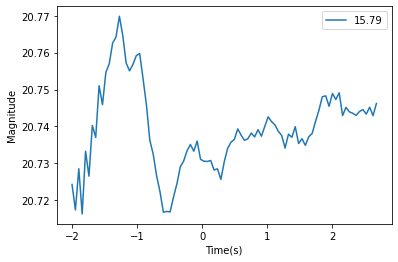

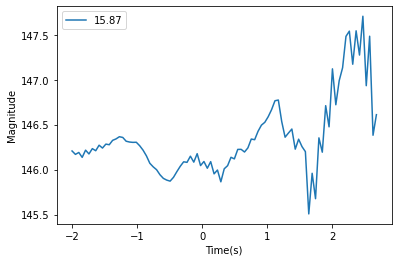

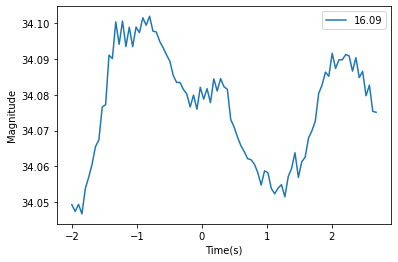

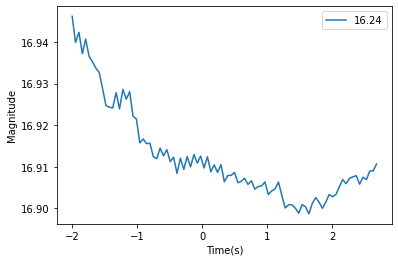

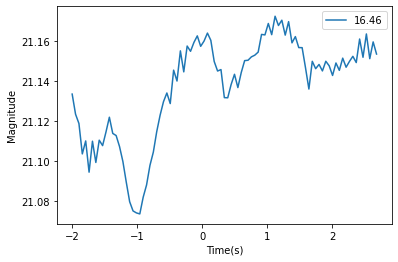

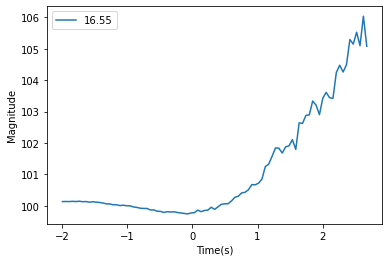

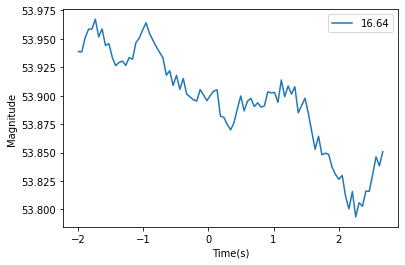

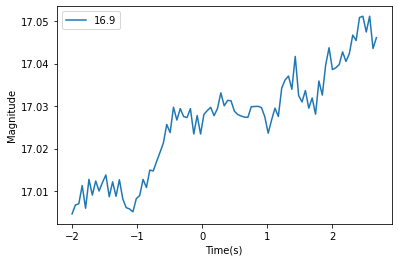

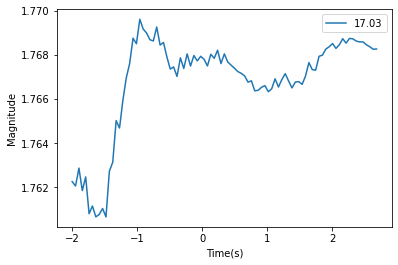

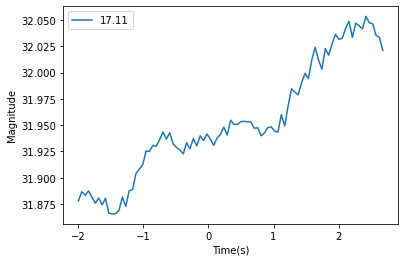

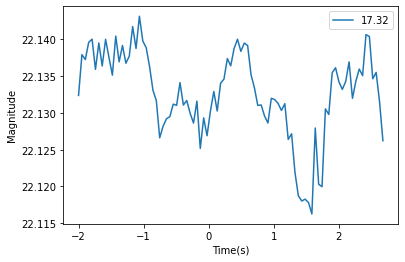

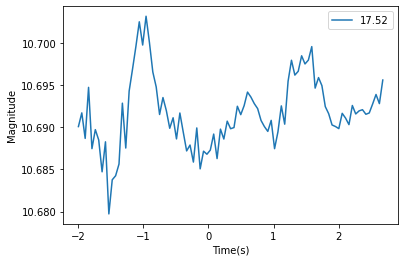

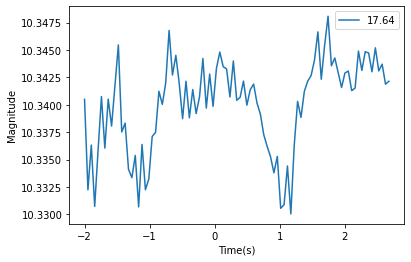

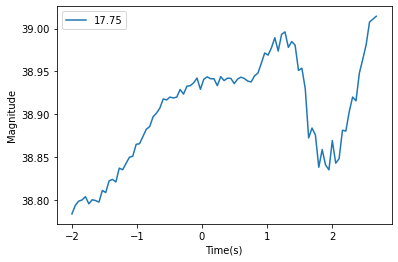

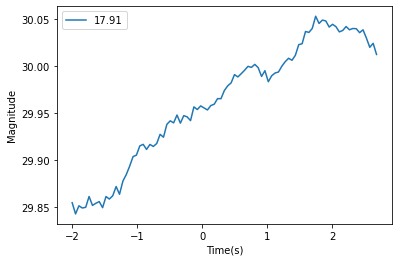

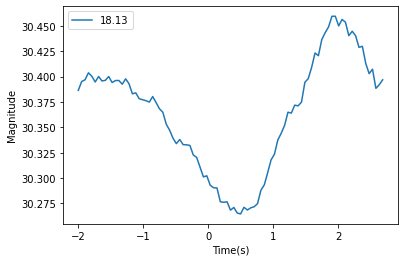

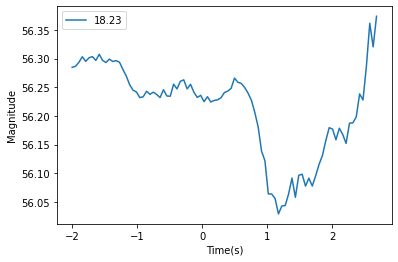

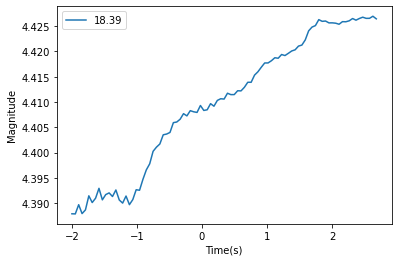

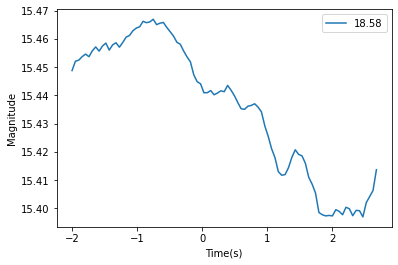

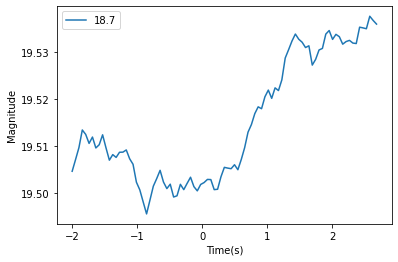

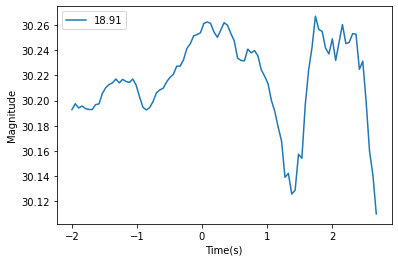

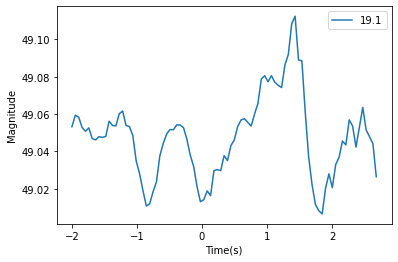

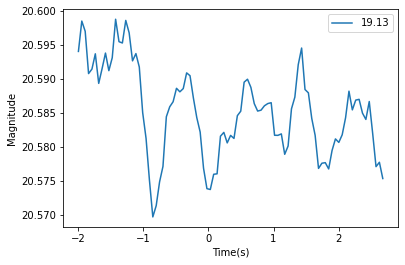

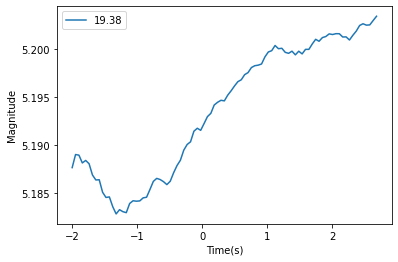

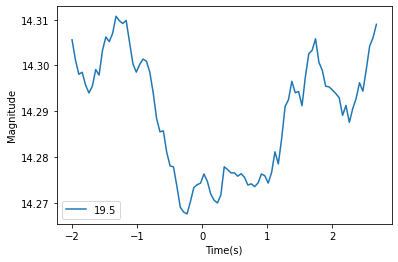

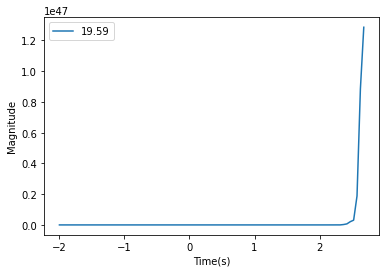

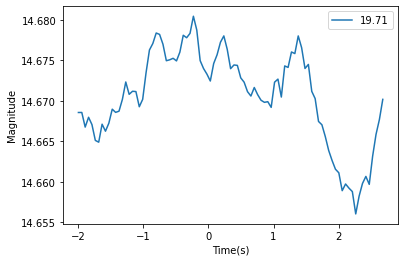

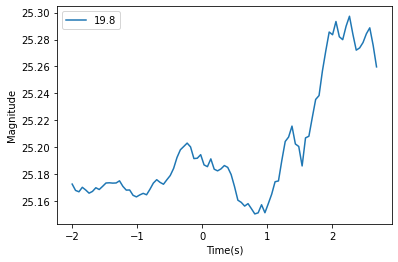

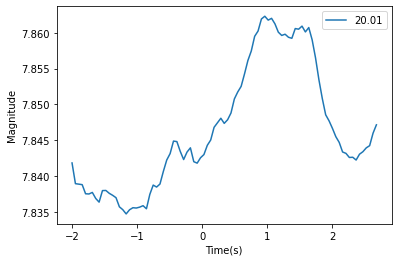

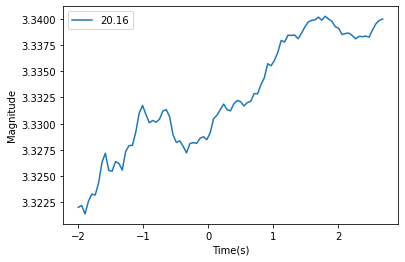

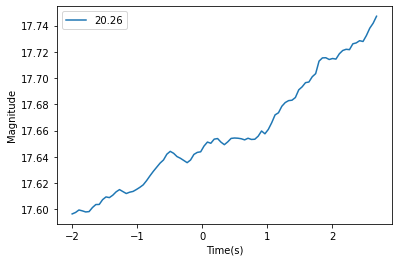

In [16]:
for i in range(len(f)//2):
    plt.plot(tpack, bpack[i,:], label=str(np.round(f[i],2)))
# xtime = np.arange(20)
# plt.plot(xtime, bpack[0,:], marker='o')
# plt.xticks(np.arange(20),('-1.0','','-0.6','','-0.2','','0.2','','0.6','','1.0','','1.4','','1.8','','2.2','',
#                         '2.6',''))
    plt.legend()
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.show()

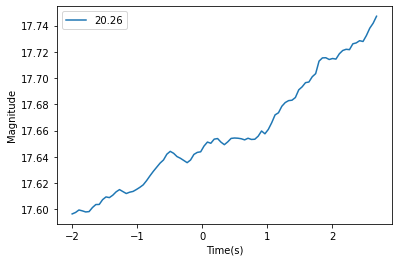

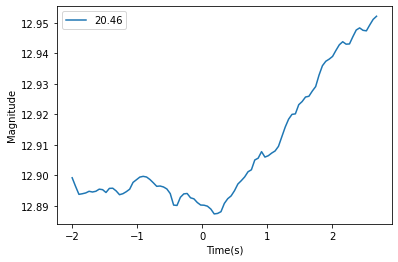

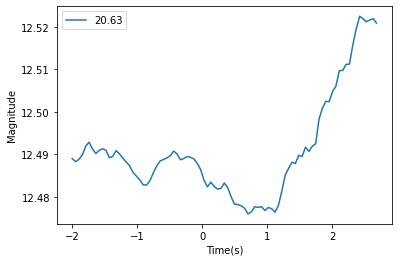

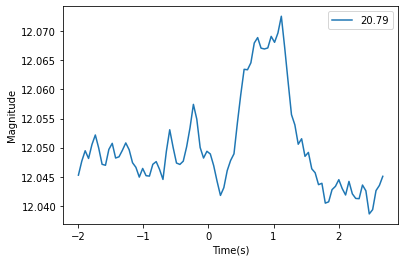

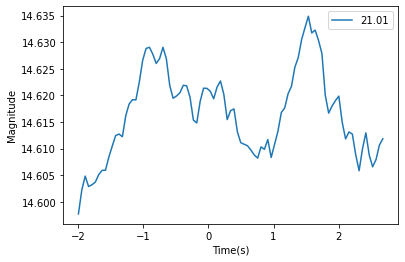

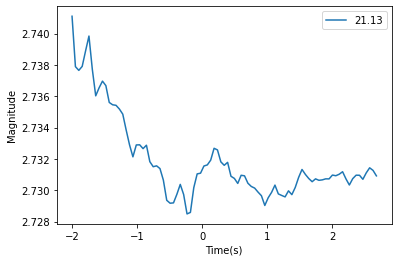

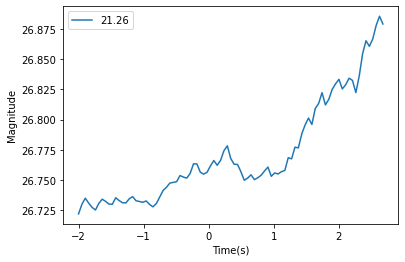

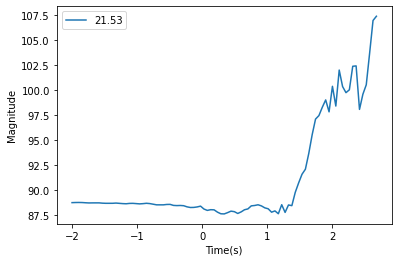

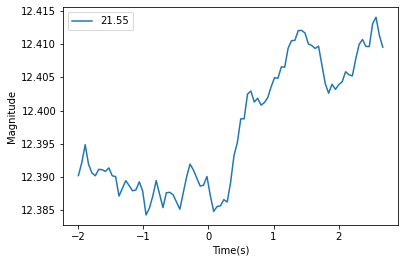

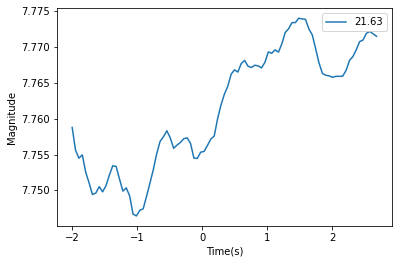

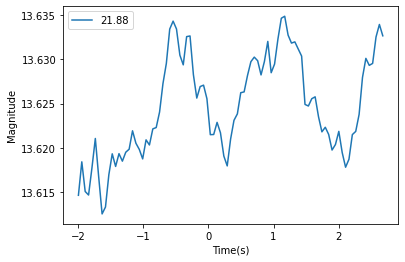

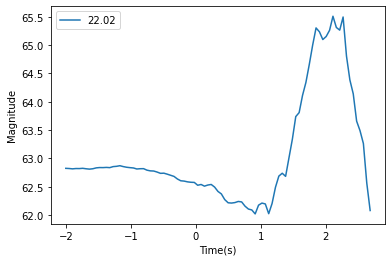

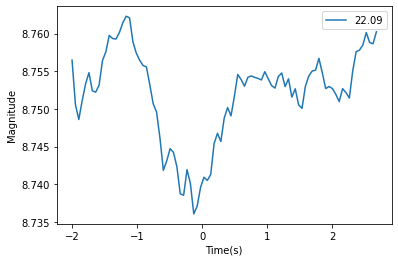

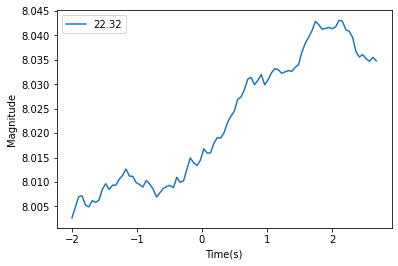

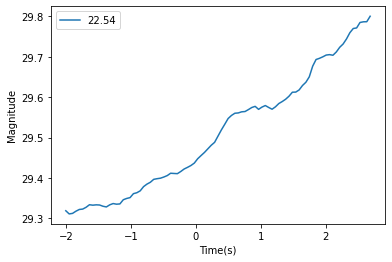

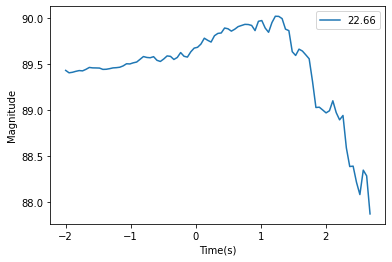

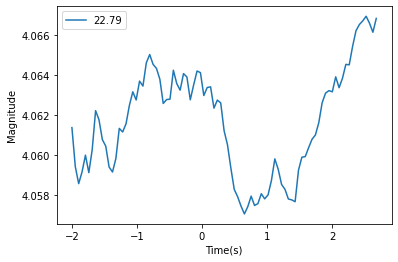

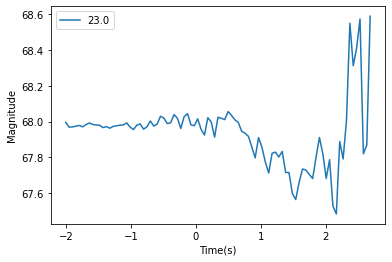

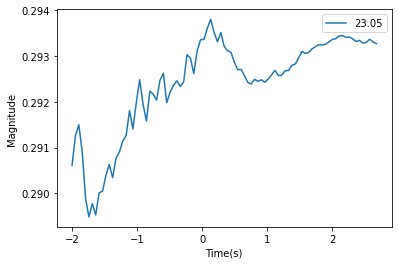

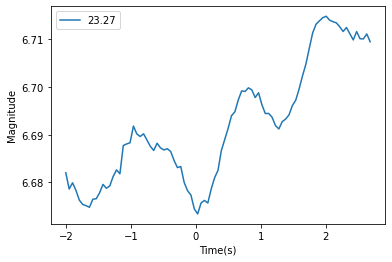

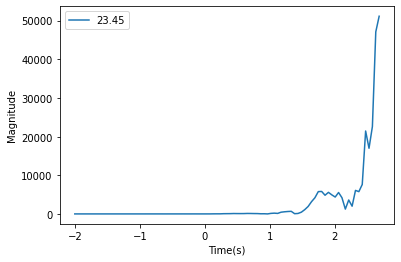

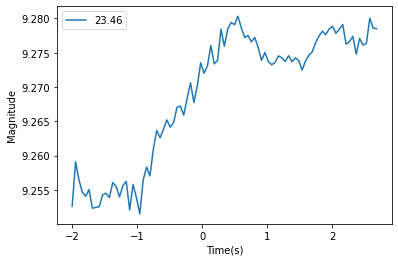

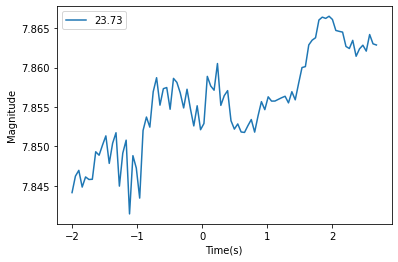

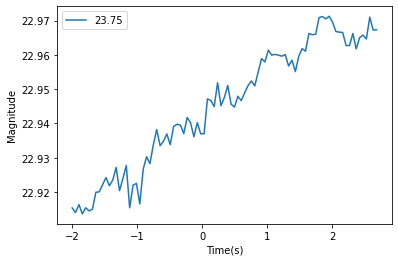

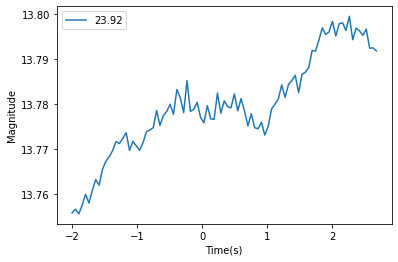

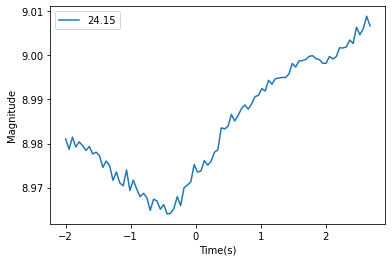

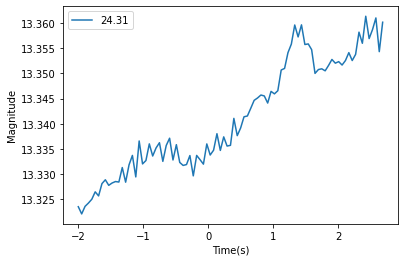

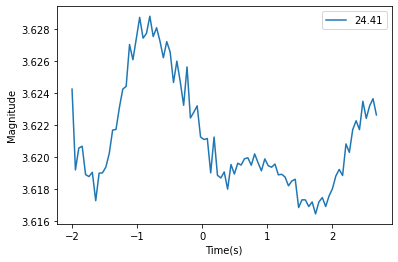

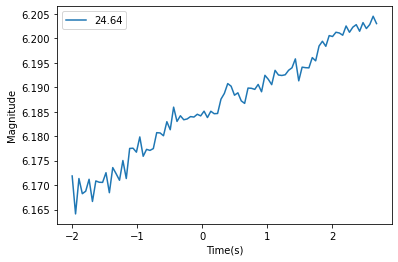

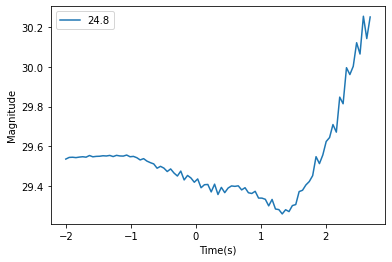

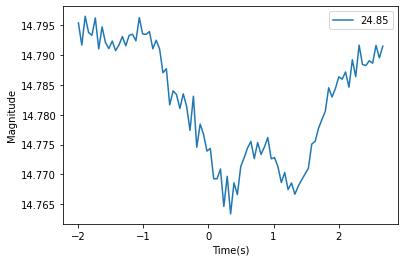

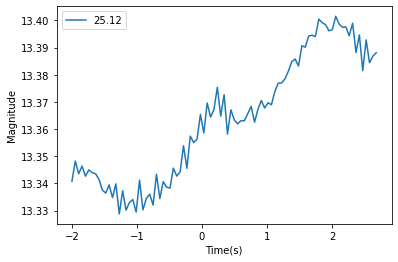

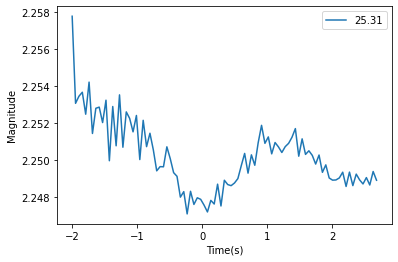

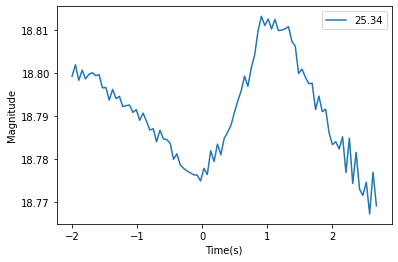

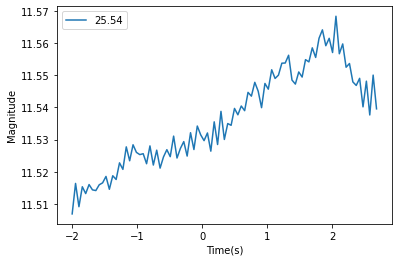

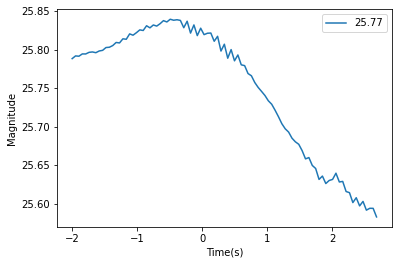

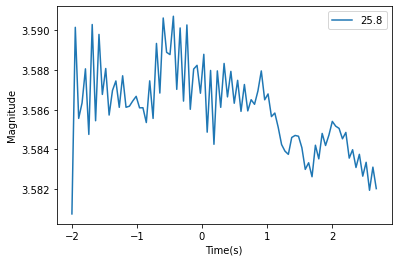

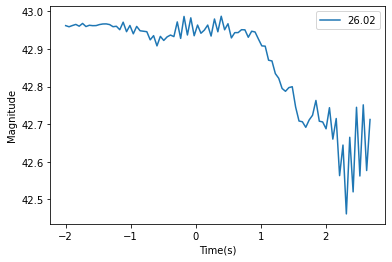

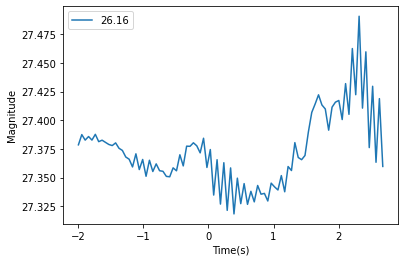

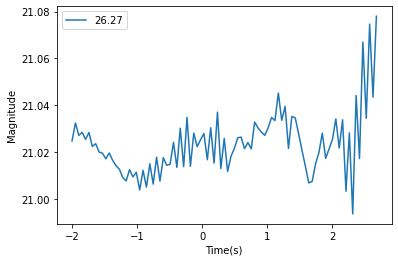

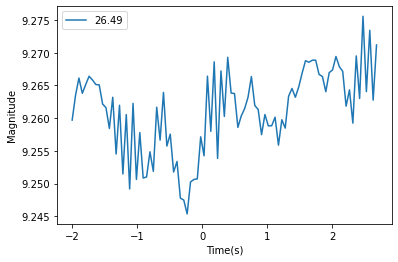

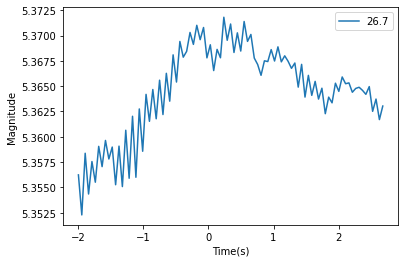

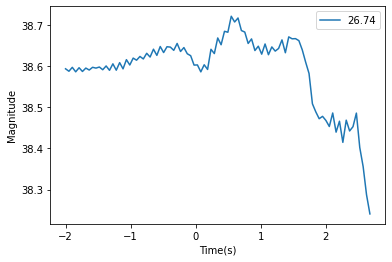

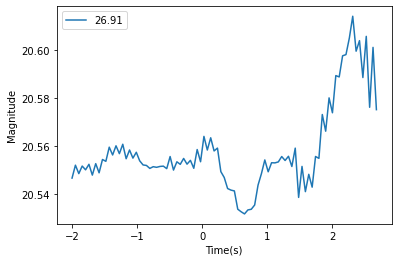

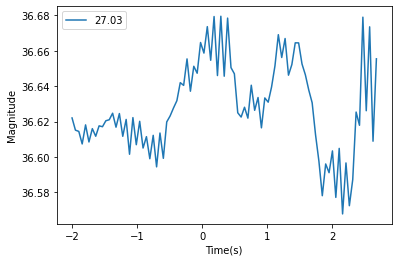

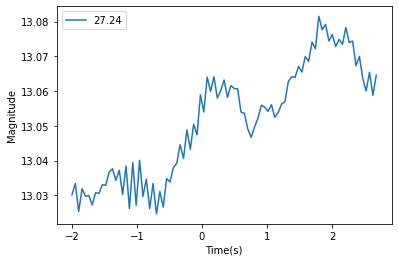

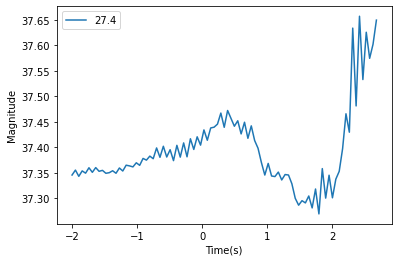

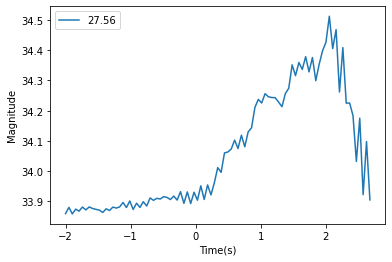

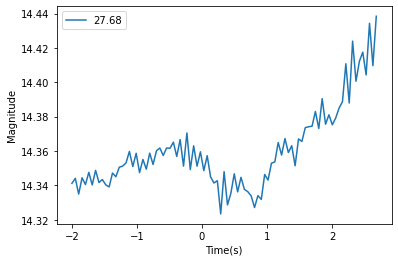

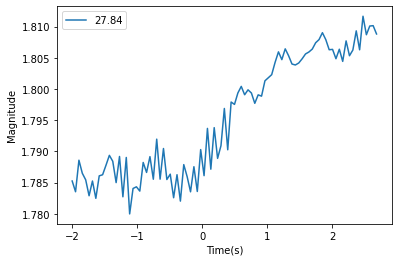

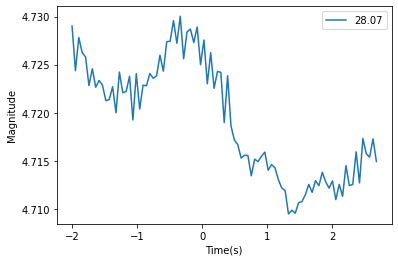

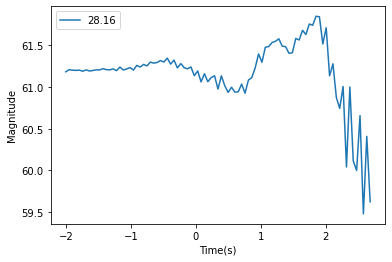

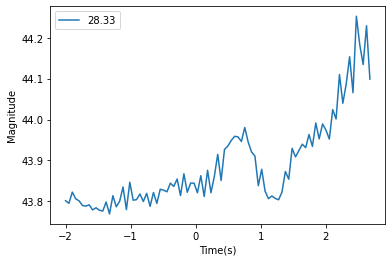

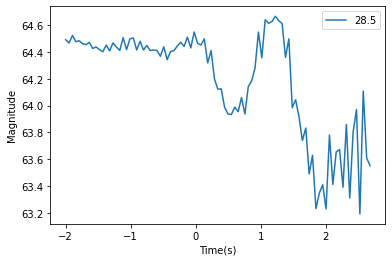

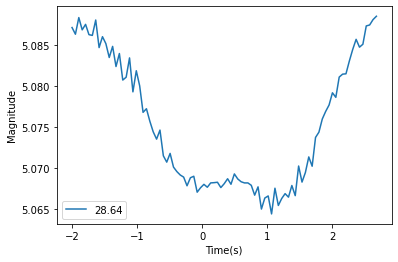

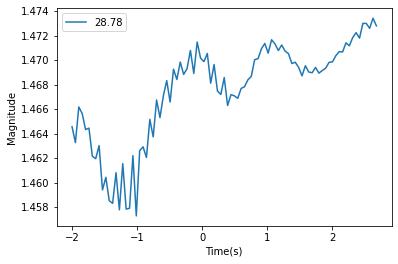

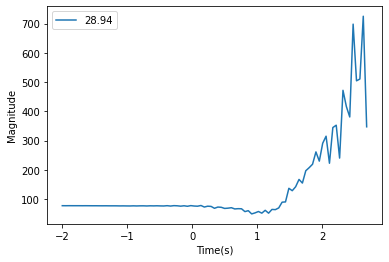

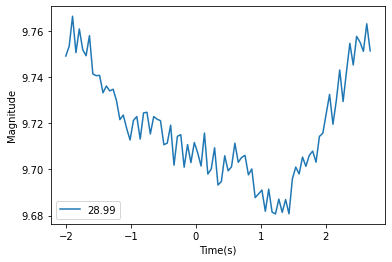

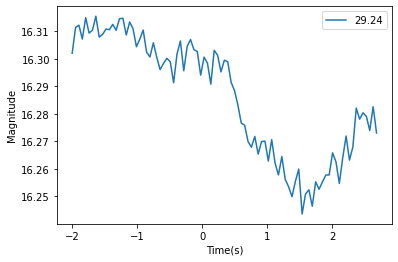

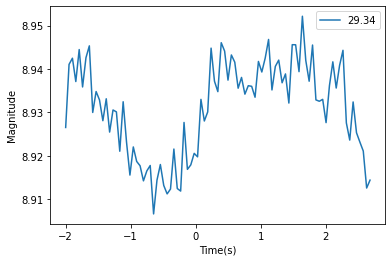

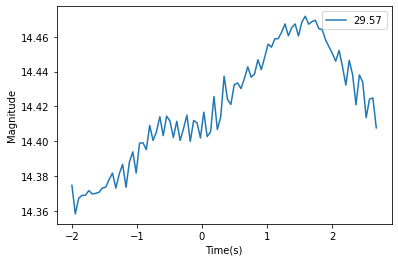

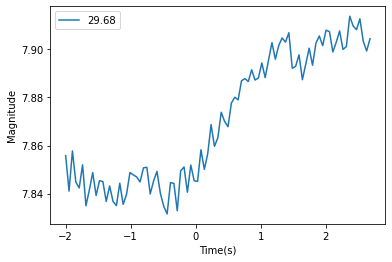

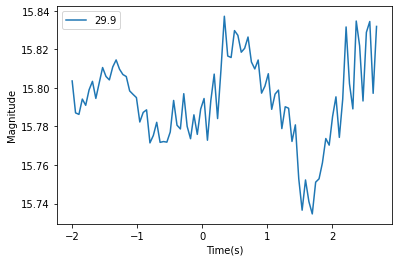

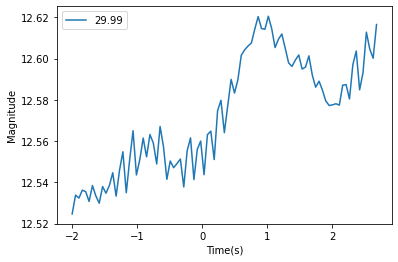

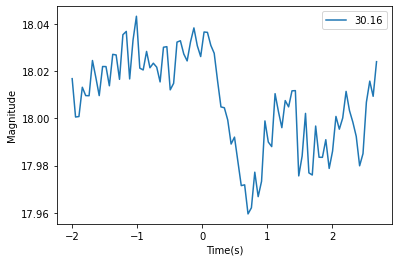

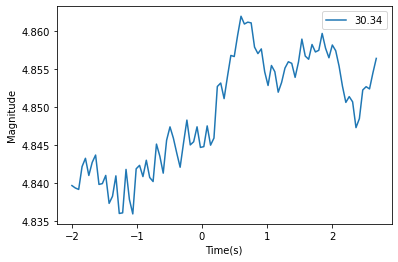

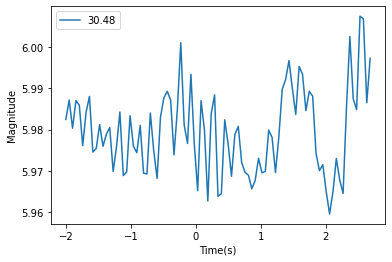

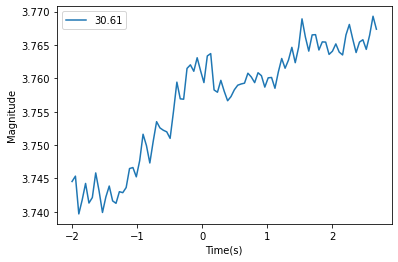

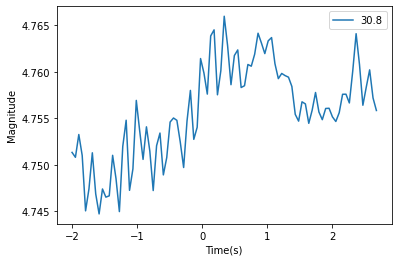

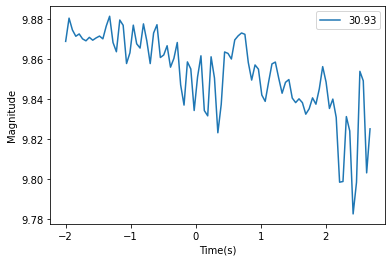

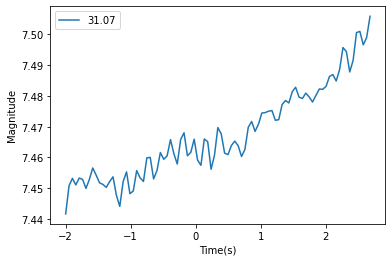

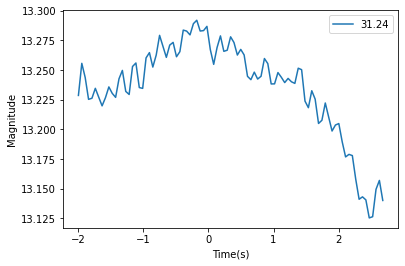

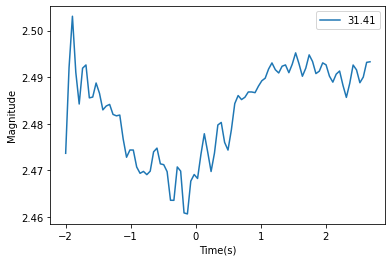

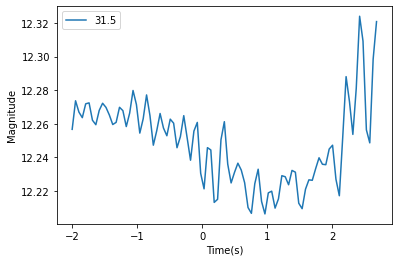

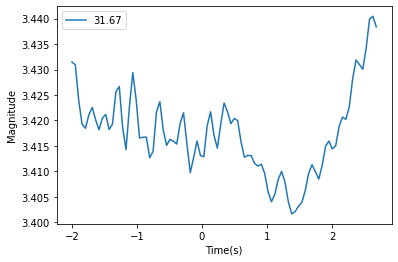

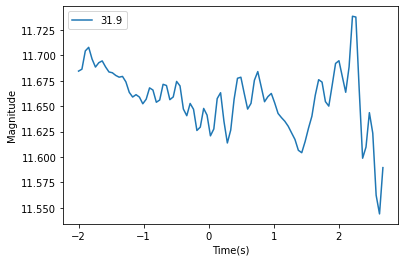

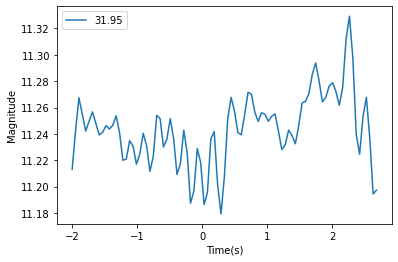

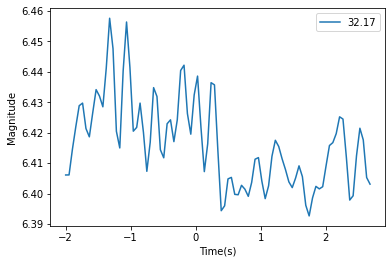

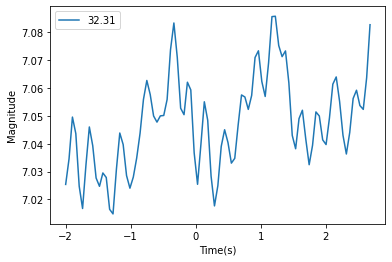

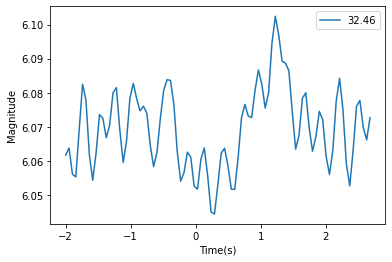

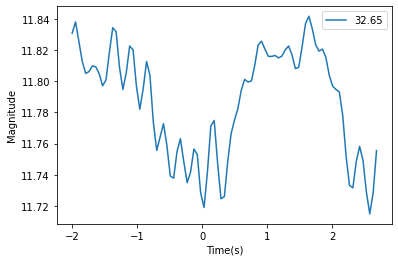

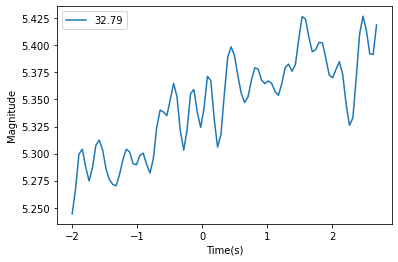

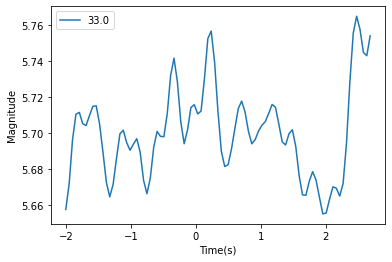

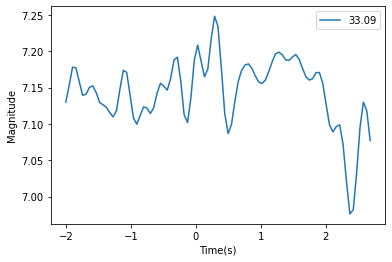

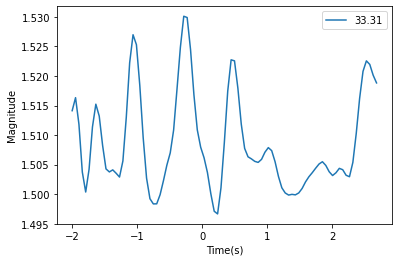

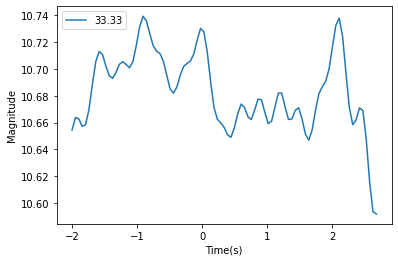

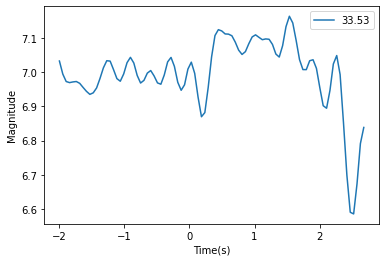

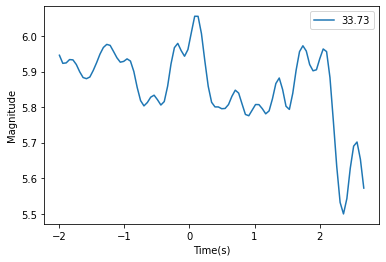

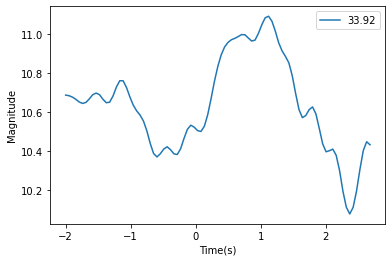

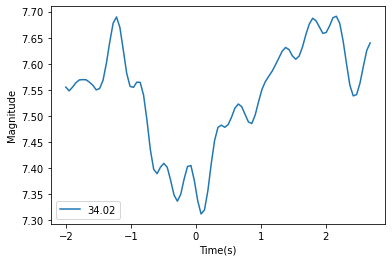

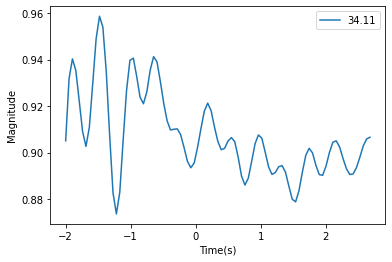

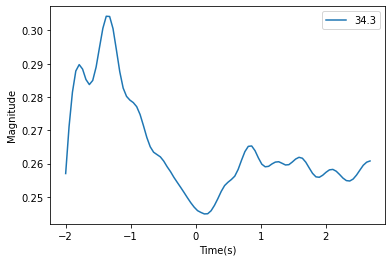

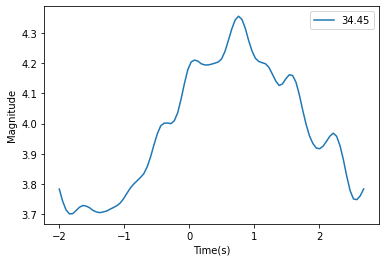

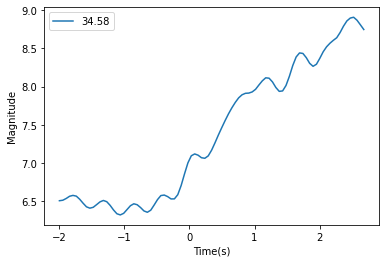

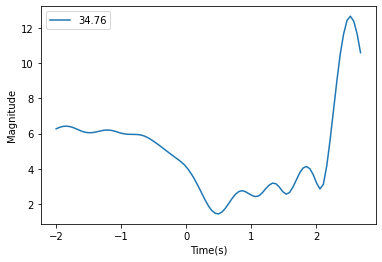

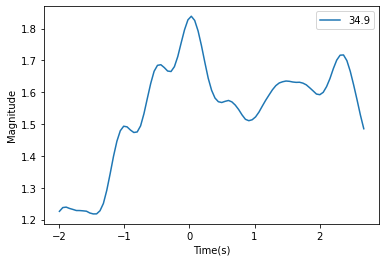

In [17]:
for j in range(i, len(f)):
    plt.plot(tpack, bpack[j,:], label=str(np.round(f[j],2)))
#plt.xticks(np.arange(20),('-1.0','','-0.6','','-0.2','','0.2','','0.6','','1.0','','1.4','','1.8','','2.2','',
#                        '2.6',''))
    plt.legend()
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.show()